In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to new lines

In [3]:
def input_data():
    autori = pd.read_excel("./data/autori.xlsx")
    epidem = pd.read_excel("./data/epidemiologija.xlsx")
    imun = pd.read_excel("./data/imunologija.xlsx")
    infek = pd.read_excel("./data/infektivne_bolesti.xlsx")
    mikro = pd.read_excel("./data/mikrobiologija.xlsx")
    return autori, epidem, imun,infek,mikro

autori, epidem, imun, infek, mikro = input_data()

In [4]:
print(autori.head())
print(autori.shape)
autori['id'] = autori.index
print(f"Tipovi kolona za autore: {autori.dtypes}")

          Ime            Prezime                    Katedra H indeks  Broj radova
0       Tanja          Jovanovic  Katedra za mikrobiologiju       11         45.0
1  Branislava              Savic  Katedra za mikrobiologiju       10         30.0
2       Sanja           Mitrovic  Katedra za mikrobiologiju        4         20.0
3       Lazar              Ranin  Katedra za mikrobiologiju        7         40.0
4   Valentina  Arsic-Arsenijevic  Katedra za mikrobiologiju       17         52.0
(59, 5)
Tipovi kolona za autore: Ime             object
Prezime         object
Katedra         object
H indeks        object
Broj radova    float64
id               int64
dtype: object


In [7]:
autori['H indeks'] = pd.to_numeric(autori['H indeks'], errors='coerce')
# uklanjanje autora za koje nemam podataka o broju radova i H indeksu
autori_null_rows = autori[pd.DataFrame(autori).isnull().any(axis=1)]
print(f"Redovi koje sadrze null vrednosti autori: \n {autori_null_rows}")
print(f'Broj autora pre izbacivanja: {autori.shape[0]}')

Redovi koje sadrze null vrednosti autori: 
            Ime      Prezime                    Katedra  H indeks  Broj radova  id
21    Danijela   Miljanovic  Katedra za mikrobiologiju       1.0          NaN  21
22       Marko     Jankovic  Katedra za mikrobiologiju       NaN          NaN  22
24      Stefan    Mijatovic  Katedra za mikrobiologiju       NaN          NaN  24
31      Marina  Stamenkovic     Katedra za imunologiju       NaN          NaN  31
43  Aleksandra      Nikolic  Katedra za epidemiologiju       NaN          NaN  43
44      Aleksa    Jovanovic  Katedra za epidemiologiju       NaN          NaN  44
Broj autora pre izbacivanja: 59


In [9]:
autori = autori.dropna()
print(f"Da li sada sadrze null vrednosti autori: {pd.DataFrame(autori).isnull().any()}")
autori['H indeks'] = autori['H indeks'].astype('int64')
autori['Broj radova'] = autori['Broj radova'].astype('int64')
print(f'Broj autora nakon izbacivanja: {autori.shape[0]}')

Da li sada sadrze null vrednosti autori: Ime            False
Prezime        False
Katedra        False
H indeks       False
Broj radova    False
id             False
dtype: bool
Broj autora nakon izbacivanja: 53


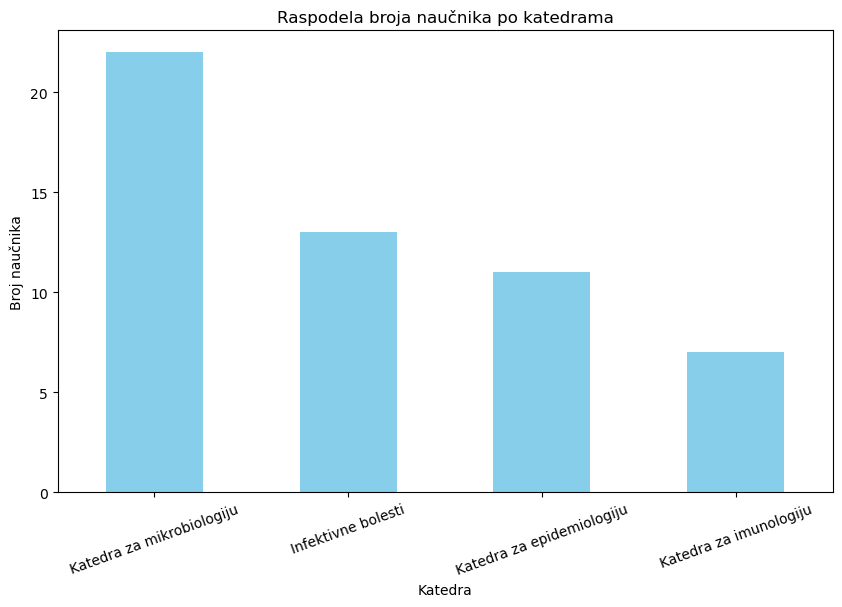

In [11]:
katedra_counts = autori['Katedra'].value_counts()
plt.figure(figsize=(10, 6))
katedra_counts.plot(kind='bar', color='skyblue')
plt.title('Raspodela broja naučnika po katedrama')
plt.xlabel('Katedra')
plt.ylabel('Broj naučnika')
plt.xticks(rotation=20)  # Rotate x labels for better readability
plt.savefig('katedra_distribution.png', bbox_inches='tight')
plt.show()


In [13]:
print(f'Tipovi nakon promene autori: {autori.dtypes}')
# provera da li su ime i prezime jedinstveni kao celina
full_name_authors_duplicated = autori.duplicated(subset=['Ime', 'Prezime'], keep=False)
print(f"Redovi sa dupliranim imenom i prezimenom: {autori[full_name_authors_duplicated]}")

Tipovi nakon promene autori: Ime            object
Prezime        object
Katedra        object
H indeks        int64
Broj radova     int64
id              int64
dtype: object
Redovi sa dupliranim imenom i prezimenom: Empty DataFrame
Columns: [Ime, Prezime, Katedra, H indeks, Broj radova, id]
Index: []


In [15]:
autori['Ime'] = autori['Ime'].str.lower()
autori['Prezime'] = autori['Prezime'].str.lower()
autori['Katedra'] = autori['Katedra'].str.lower()
autori['Puno ime'] = autori['Ime'].str.cat(autori['Prezime'], sep=' ', na_rep='')
autori['Skraceno'] = autori['Prezime']+' ' + autori['Ime'].str[0]+'.'
#ako prezime ima crticu jasmina simonovic babic ona je skraceno napisana koa babic j.s. ili kao simonovic-babic j.???
#two_last_names = autori[autori['Prezime'].str.contains('-')]
#print(f'Dva prezimena imaju \n {two_last_names}')
#Proveri za ovo

In [17]:
with open('./data/autori_cleaned', 'wb') as file:
    pickle.dump(autori, file)

In [19]:
#prikaz raspodele broja radova po katedrama
department_papers = autori.groupby('Katedra')['Broj radova'].sum().reset_index()
print("Broj radova po razlicitim katedrama")
print(department_papers)
# plt.figure(figsize=(10, 6))
# plt.bar(department_papers['Katedra'], department_papers['Broj radova'], color='skyblue')
# plt.title('Raspodela broja radova po katedrama')
# plt.xlabel('Katedra')
# plt.ylabel('Broj radova')
# plt.xticks(rotation=0)  # Rotate x labels for better readability
# plt.savefig('radovi_distribution.png', bbox_inches='tight')
# plt.show()
print("Infektivne iz fajla: ", infek.shape)
print("Epidemiologija iz fajla: ", epidem.shape)
print("Imunologija iz fajla: ", imun.shape)
print("Mikrobiologija iz fajla: ", mikro.shape)
#Vidim da potencijalno imam ponovljen rad u fajlu za infektivne i za imunologiju

Broj radova po razlicitim katedrama
                     Katedra  Broj radova
0         infektivne bolesti          273
1  katedra za epidemiologiju          673
2     katedra za imunologiju          368
3  katedra za mikrobiologiju          661
Infektivne iz fajla:  (274, 15)
Epidemiologija iz fajla:  (673, 15)
Imunologija iz fajla:  (369, 15)
Mikrobiologija iz fajla:  (661, 15)


In [21]:

good_articles_format = ['Article', 'Article in Press', 'Review', 'Book Chapter', 'Letter', 'Note']
#Izbaceni radovi objavljeni u ne validnim formatima
infek = infek[infek['Document Type'].isin(good_articles_format)]
epidem = epidem[epidem['Document Type'].isin(good_articles_format)]
imun = imun[imun['Document Type'].isin(good_articles_format)]
mikro = mikro[mikro['Document Type'].isin(good_articles_format)]
print("Infektivne iz fajla: ", infek.shape)
print("Epidemiologija iz fajla: ", epidem.shape)
print("Imunologija iz fajla: ", imun.shape)
print("Mikrobiologija iz fajla: ", mikro.shape)


Infektivne iz fajla:  (266, 15)
Epidemiologija iz fajla:  (665, 15)
Imunologija iz fajla:  (344, 15)
Mikrobiologija iz fajla:  (638, 15)


In [23]:
infek_null_rows = pd.DataFrame(infek).isnull().any(axis=0)
print(f"Kolone koje sadrze null vrednosti infek: \n {infek_null_rows}")
for column in ['Volume', 'Art. No.', 'Page start','Page end','Page count','Link','Source']:
    if column  in infek.columns:
        infek = infek.drop([column], axis=1)
    if column in epidem.columns:
        epidem = epidem.drop([column], axis=1)
    if column in imun.columns:
        imun = imun.drop([column], axis=1)
    if column in mikro.columns:
        mikro = mikro.drop([column], axis=1)

Kolone koje sadrze null vrednosti infek: 
 Author           False
Authors          False
Title            False
Year             False
Source title     False
Volume            True
Issue             True
Art. No.          True
Page start        True
Page end          True
Page count        True
Cited by          True
Link             False
Document Type    False
Source           False
dtype: bool


In [25]:
print(f"Infektivne kolone = {infek.columns}")
print(f"Epidemiologija kolone = {epidem.columns}")
print(f"Imunologija kolone = {imun.columns}")
print(f"Mikrobiologija kolone = {mikro.columns}")

Infektivne kolone = Index(['Author', 'Authors', 'Title', 'Year', 'Source title', 'Issue',
       'Cited by', 'Document Type'],
      dtype='object')
Epidemiologija kolone = Index(['Author', 'Authors', 'Title', 'Year', 'Source title', 'Issue',
       'Cited by', 'Document Type'],
      dtype='object')
Imunologija kolone = Index(['Author', 'Authors', 'Title', 'Year', 'Source title', 'Issue',
       'Cited by', 'Document Type'],
      dtype='object')
Mikrobiologija kolone = Index(['Author', 'Authors', 'Title', 'Year', 'Source title', 'Issue',
       'Cited by', 'Document Type'],
      dtype='object')


In [27]:
for column in ['Author', 'Authors','Source title', 'Title']:
    if column in infek.columns:
        infek[column] = infek[column].str.lower()
    if column in epidem.columns:
        epidem[column] = epidem[column].str.lower()
    if column in imun.columns:
        imun[column] = imun[column].str.lower()
    if column in mikro.columns:
        mikro[column] = mikro[column].str.lower()

print(f"Infektivno dataTypes: {infek.dtypes}")
print(f"Epidemiologija dataTypes: {epidem.dtypes}")
print(f"Imuno dataTypes: {imun.dtypes}")
print(f"Mikro dataTypes: {mikro.dtypes}")

Infektivno dataTypes: Author            object
Authors           object
Title             object
Year             float64
Source title      object
Issue             object
Cited by         float64
Document Type     object
dtype: object
Epidemiologija dataTypes: Author            object
Authors           object
Title             object
Year               int64
Source title      object
Issue             object
Cited by         float64
Document Type     object
dtype: object
Imuno dataTypes: Author            object
Authors           object
Title             object
Year             float64
Source title      object
Issue             object
Cited by         float64
Document Type     object
dtype: object
Mikro dataTypes: Author            object
Authors           object
Title             object
Year               int64
Source title      object
Issue             object
Cited by         float64
Document Type     object
dtype: object


In [29]:
#u autori mi pise autor rada kome je pridruzen sa faksa
infektivno_authors = infek.assign(AllAuthors=infek['Authors'].str.split(',')).explode('Authors')
print('Ovde vise autora: ', infektivno_authors)
author_counts_whole = infektivno_authors['AllAuthors'].value_counts()

radovi_po_autoru_pridruzeni = infek.groupby('Author').size()
print(f'Radovi po autoru pridruzeni {radovi_po_autoru_pridruzeni}')

Ovde vise autora:                        Author                                            Authors                                              Title    Year                                  Source title                Issue  Cited by     Document Type                                         AllAuthors
0    jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health                    3       NaN           Article  [chkhartishvili n.,  holban t.,  babić j.s.,  ...
1    jasmina simonovic-babic  jordovic j., simonovic-babic j., gasic v., kot...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries                    6       1.0           Article  [jordovic j.,  simonovic-babic j.,  gasic v., ...
2    jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patient

In [31]:
infek['Katedra'] = 'infektivne bolesti'
epidem['Katedra'] = 'katedra za epidemiologiju'
imun['Katedra']='katedra za imunologiju'
mikro['Katedra']='katedra za mikrobiologiju'

data = pd.concat([infek, epidem,imun,mikro], ignore_index=True)
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       NaN           Article  infektivne bolesti
1  jasmina simonovic-babic  jordovic j., simonovic-babic j., gasic v., kot...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti
2  jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0               journal of medical biochemistry     1       2.0           Article  infektivne bolesti
3  jasmina simonovic-babic  kowalska j.d., bursa d.,

In [33]:
duplicates = data[data.duplicated(subset=['Title', 'Author'], keep=False)]
print(duplicates)

                           Author                                            Authors                                              Title    Year                             Source title  Issue  Cited by     Document Type                    Katedra
2         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0          journal of medical biochemistry      1       2.0           Article         infektivne bolesti
4         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2018.0          journal of medical biochemistry    NaN       NaN  Article in Press         infektivne bolesti
174               ksenija bojovic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0          journal of medical biochemistry      1       2.0           Article         infektivne bolesti
177         

In [35]:
def unique_values(series):
    return series.unique().tolist()

grouped = duplicates.groupby(['Title', 'Author']).agg(unique_values).reset_index()

def check_differences(row):
    differences = {}
    for col in row.index[2:]: 
        if len(row[col]) > 1:
            differences[col] = row[col]
    return differences

grouped['Differences'] = grouped.apply(check_differences, axis=1)
# Filter out rows with no differences
difference_summary = grouped[grouped['Differences'].map(bool)]
text_output = "Title, Author, Differences\n"
for index, row in difference_summary.iterrows():
    text_output += f"{row['Title']}, {row['Author']}, {row['Differences']}\n"
with open('./calculation/radovi_po_autoru.txt','w') as file:
    file.write(text_output)
   

UnicodeEncodeError: 'charmap' codec can't encode character '\u0107' in position 8152: character maps to <undefined>

In [ ]:
duplicate_indices = duplicates.index
na_indices = data.loc[duplicate_indices, 'Cited by'].isna()
na_indices = na_indices[na_indices].index
print('na_indeces: ', na_indices)
print(data.loc[na_indices])

In [38]:
data.drop(index=na_indices, inplace=True)

NameError: name 'na_indices' is not defined

In [40]:
duplicates = data[data.duplicated(subset=['Title', 'Author'], keep=False)]
print(duplicates)

                           Author                                            Authors                                              Title    Year                             Source title  Issue  Cited by     Document Type                    Katedra
2         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0          journal of medical biochemistry      1       2.0           Article         infektivne bolesti
4         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2018.0          journal of medical biochemistry    NaN       NaN  Article in Press         infektivne bolesti
174               ksenija bojovic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0          journal of medical biochemistry      1       2.0           Article         infektivne bolesti
177         

In [42]:
data.drop(index=[1865,493], inplace=True)

In [44]:
duplicates = data[data.duplicated(subset=['Title', 'Author'], keep=False)]
print(duplicates)

                           Author                                            Authors                                              Title    Year                          Source title  Issue  Cited by     Document Type                    Katedra
2         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0       journal of medical biochemistry      1       2.0           Article         infektivne bolesti
4         jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2018.0       journal of medical biochemistry    NaN       NaN  Article in Press         infektivne bolesti
174               ksenija bojovic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0       journal of medical biochemistry      1       2.0           Article         infektivne bolesti
177               ksenij

In [46]:
data.drop_duplicates(subset=['Title', 'Year','Authors','Author'], inplace=True)

In [48]:
grupisani_radovi_po_autoru = data.groupby('Title').size()
print(f'Grupisani radovi po autoru: {grupisani_radovi_po_autoru.max()}')

Grupisani radovi po autoru: 11


In [50]:
data['Author count'] = data.groupby('Title')['Author'].transform('count')
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra  Author count
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       NaN           Article  infektivne bolesti             1
1  jasmina simonovic-babic  jordovic j., simonovic-babic j., gasic v., kot...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti             5
2  jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0               journal of medical biochemistry     1       2.0           Article  infektivne bolesti           

In [52]:
radovi_po_autoru_broj = data.groupby(['Author','Katedra'])['Title'].size().sort_values(ascending=False)
print(f'Radovi po autoru pridruzeni /n {radovi_po_autoru_broj}')

Radovi po autoru pridruzeni /n Author                          Katedra                  
tatjana pekmezovic              katedra za epidemiologiju    262
vladimir trajkovic              katedra za imunologiju       155
vera pravica                    katedra za imunologiju        88
ljiljana markovic-denic         katedra za epidemiologiju     84
tatjana gazibara                katedra za epidemiologiju     77
maja stanojevic                 katedra za mikrobiologiju     70
darija kisic-tepavcevic         katedra za epidemiologiju     62
valentina arsic-arsenijevic     katedra za mikrobiologiju     50
ivana cirkovic                  katedra za mikrobiologiju     46
dusan popadic                   katedra za imunologiju        46
tanja jovanovic                 katedra za mikrobiologiju     44
dragana vukovic                 katedra za mikrobiologiju     43
jovan ranin                     infektivne bolesti            42
ivana lazarevic                 katedra za mikrobiologiju     40
l

In [54]:
radovi_jednom = data.drop_duplicates(subset=['Title', 'Year','Authors', 'Katedra'])

Broj radova po razlicitim katedrama
                     Katedra  Title
0  katedra za epidemiologiju    513
1  katedra za mikrobiologiju    385
2     katedra za imunologiju    272
3         infektivne bolesti    152


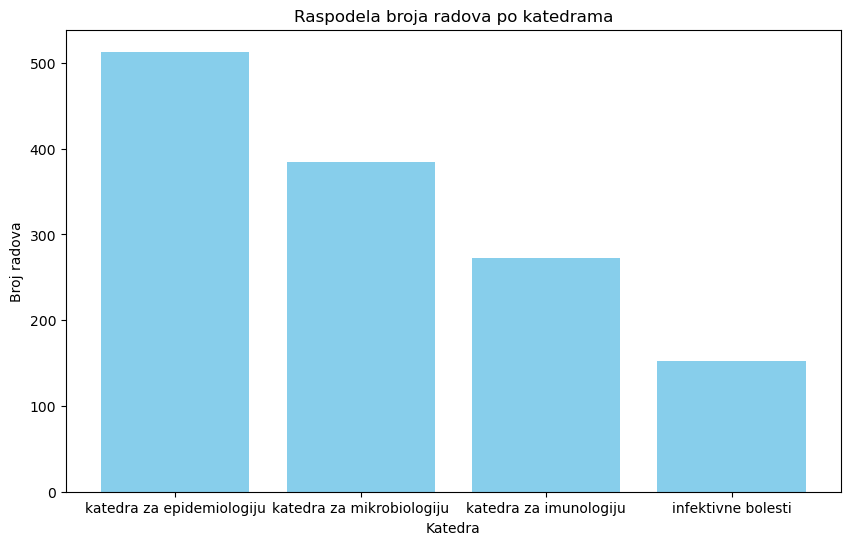

In [56]:
radovi_po_autoru_broj_katedra_grupisani = radovi_jednom.groupby('Katedra')['Title'].count().sort_values(ascending=False).reset_index()
print("Broj radova po razlicitim katedrama")
print(radovi_po_autoru_broj_katedra_grupisani)
plt.figure(figsize=(10, 6))
plt.bar(radovi_po_autoru_broj_katedra_grupisani['Katedra'], radovi_po_autoru_broj_katedra_grupisani['Title'], color='skyblue')
plt.title('Raspodela broja radova po katedrama')
plt.xlabel('Katedra')
plt.ylabel('Broj radova')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.savefig('radovi_distribution.png', bbox_inches='tight')
plt.show()
#Vidim da potencijalno imam ponovljen rad u fajlu z

In [59]:
data['CoauthorsCount'] = data['Authors'].apply(lambda x: len(x.split(',')))
data['Fraction'] = 1 / (data['CoauthorsCount']) # data['Author count'] + da delim i sa tim 
fractional_counts = data.groupby(['Author','Katedra'])['Fraction'].sum().sort_values(ascending=False)

print("\nFractional Count (Fraction of Papers per Author):")
print(fractional_counts)


Fractional Count (Fraction of Papers per Author):
Author                          Katedra                  
tatjana pekmezovic              katedra za epidemiologiju    43.947876
vladimir trajkovic              katedra za imunologiju       24.211887
ljiljana markovic-denic         katedra za epidemiologiju    17.727477
vera pravica                    katedra za imunologiju       14.234907
tatjana gazibara                katedra za epidemiologiju    13.978644
darija kisic-tepavcevic         katedra za epidemiologiju     9.873965
lazar ranin                     katedra za mikrobiologiju     8.392460
ivana cirkovic                  katedra za mikrobiologiju     8.246388
maja stanojevic                 katedra za mikrobiologiju     8.004936
tanja jovanovic                 katedra za mikrobiologiju     7.320437
dragana vukovic                 katedra za mikrobiologiju     7.319444
slobodanka djukic               katedra za mikrobiologiju     7.233333
valentina arsic-arsenijevic     katedra

In [61]:
author_coauthors = data.groupby(['Author','Katedra'])['CoauthorsCount'].sum()
author_publications = data.groupby('Author').size()
average_coauthors_per_author = author_coauthors / author_publications
print(f'Prosek po autoru: {average_coauthors_per_author.sort_values(ascending=False)}')


Prosek po autoru: Author                          Katedra                  
eleonora dubljanin              katedra za mikrobiologiju    380.027778
isidora vujcic                  katedra za epidemiologiju    343.814815
valentina arsic-arsenijevic     katedra za mikrobiologiju     81.140000
maja stanojevic                 katedra za mikrobiologiju     32.342857
vladimir trajkovic              katedra za imunologiju        32.161290
irena arandjelovic              katedra za mikrobiologiju     32.000000
branislava savic                katedra za mikrobiologiju     18.740741
jasmina simonovic-babic         infektivne bolesti            14.470588
jelena jordovic                 infektivne bolesti            12.142857
irena vukovic-petrovic          katedra za imunologiju        12.000000
natasa nikolic                  infektivne bolesti            11.818182
jovan malinic                   infektivne bolesti            10.000000
ivana lazarevic                 katedra za mikrobiologiju   

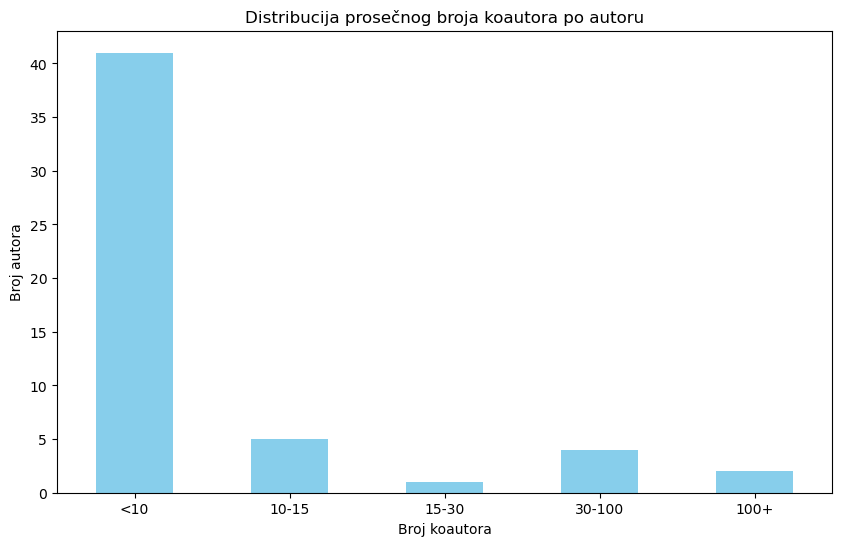

In [63]:
bins = [0, 10, 15, 30, 100, float('inf')]
labels = ['<10', '10-15', '15-30', '30-100', '100+']
binned_data = pd.cut(average_coauthors_per_author, bins=bins, labels=labels, right=False)

# Count occurrences in each bin
bin_counts = binned_data.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')
plt.title('Distribucija prosečnog broja koautora po autoru')
plt.xlabel('Broj koautora')
plt.ylabel('Broj autora')
plt.xticks(rotation=0)

# Save the plot
plt.savefig('coauthor_distribution.png')

# Show the plot (optional)
plt.show()

Provera da li imam ne konzisentne Cited by vrednosti

In [66]:
def check_cited_by_consistency(group):
    return group['Cited by'].nunique() == 1

# Apply the function
inconsistent_papers = data.groupby('Title').apply(lambda x: not check_cited_by_consistency(x))

# Filter out inconsistent papers
inconsistent_papers = inconsistent_papers[inconsistent_papers]

# Print inconsistent papers
print("Inconsistent Papers:")
# print(inconsistent_papers.index.tolist())

Inconsistent Papers:


C:\Users\and\AppData\Local\Temp\ipykernel_16420\1563952745.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inconsistent_papers = data.groupby('Title').apply(lambda x: not check_cited_by_consistency(x))


In [68]:
data['Cited by'] = data['Cited by'].fillna(0)
cited_by_values = data.groupby('Title')['Cited by'].apply(lambda x: list(x)).reset_index()
filtered_cited_by_values = cited_by_values[cited_by_values['Cited by'].apply(lambda x: len(set(x)) > 1)]
print(filtered_cited_by_values)

                                                  Title                                           Cited by
265   cytokine gene polymorphisms and acute human li...                                        [47.0, 0.0]
463   global, regional, and national levels of mater...                                       [0.0, 279.0]
806   onychomycosis: clinical findings, etiological ...                     [1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
1019  significance of ugt1a1∗28 genotype in patients...  [2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, ...


H-indeks racunanje i razlika

In [71]:
author_citations = data.groupby('Author')['Cited by'].apply(list).reset_index()
def calculate_h_index(citations):
    # Sort citations in descending order
    sorted_citations = sorted(citations, reverse=True)
    # Calculate H-index
    h_index = 0
    for i, citation in enumerate(sorted_citations):
        if citation >= i + 1:
            h_index = i + 1
        else:
            break
    return h_index
author_citations['H-index'] = author_citations['Cited by'].apply(calculate_h_index)
print(author_citations)


                            Author                                           Cited by  H-index
0                aleksandar dzamic  [4.0, 11.0, 4.0, 1.0, 0.0, 5.0, 6.0, 3.0, 1.0,...        5
1              aleksandra knezevic  [1.0, 0.0, 6.0, 10.0, 0.0, 0.0, 6.0, 1.0, 4.0,...        8
2   aleksandra radovanovic-spurnic                               [0.0, 0.0, 3.0, 0.0]        1
3                        ana banko  [7.0, 0.0, 1.0, 0.0, 0.0, 2.0, 13.0, 1.0, 0.0,...        3
4                 branislava savic  [2.0, 1.0, 10.0, 3.0, 6.0, 1.0, 11.0, 24.0, 24...       10
5                 branko milosevic  [1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 1.0, 2.0, 4.0, ...        6
6          darija kisic-tepavcevic  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 3.0, ...       11
7                  dragana vukovic  [0.0, 2.0, 1.0, 0.0, 1.0, 15.0, 242.0, 2.0, 4....       14
8                      dusan kekic  [0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, ...        3
9                    dusan popadic  [2.0, 6.0, 11.

In [73]:
h_index_spojeno = pd.merge(autori, author_citations, left_on='Puno ime', right_on='Author', how='left')
h_index_spojeno = h_index_spojeno[['Author','H indeks','H-index']]
h_index_spojeno['Razlika'] = h_index_spojeno['H indeks'] - h_index_spojeno['H-index']
h_index_spojeno = h_index_spojeno[h_index_spojeno['Razlika'].apply(lambda x: x > 0)]
print('Autori kod kojih postoji razlika u referentnom i izracunatom H indeksu')
print(h_index_spojeno.sort_values(by="Razlika",ascending=False))

Autori kod kojih postoji razlika u referentnom i izracunatom H indeksu
                     Author  H indeks  H-index  Razlika
22             vera pravica        35       33        2
7   natasa vuckovic-opavski         1        0        1
8         aleksandar dzamic         6        5        1
24       vladimir trajkovic        37       36        1
26          emina milosevic         8        7        1


In [75]:
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra  Author count  CoauthorsCount  Fraction
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       0.0           Article  infektivne bolesti             1              64  0.015625
1  jasmina simonovic-babic  jordovic j., simonovic-babic j., gasic v., kot...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti             5              14  0.071429
2  jasmina simonovic-babic  jordovic j., bojovic k., simonovic-babic j., g...  significance of ugt1a1∗28 genotype in patients...  2019.0               journal of medical

Produktivnost katedri

In [78]:
radovi_jednom = data.drop_duplicates(subset=['Title', 'Year', 'Authors', 'Katedra'])
katedra_stats = radovi_jednom.groupby('Katedra').agg({
    'Title': 'count',
    'Cited by': 'sum'
}).reset_index()
katedra_stats = katedra_stats.rename(columns={'Title': 'Total Papers', 'Cited by': 'Total Citations'})

# Normalize the 'Total Papers' and 'Total Citations' columns
katedra_stats['Normalized Papers'] = (katedra_stats['Total Papers'] - katedra_stats['Total Papers'].min()) / (katedra_stats['Total Papers'].max() - katedra_stats['Total Papers'].min())
katedra_stats['Normalized Citations'] = (katedra_stats['Total Citations'] - katedra_stats['Total Citations'].min()) / (katedra_stats['Total Citations'].max() - katedra_stats['Total Citations'].min())

# Rank normalized values
katedra_stats['Paper Rank'] = katedra_stats['Normalized Papers'].rank(ascending=False)
katedra_stats['Citation Rank'] = katedra_stats['Normalized Citations'].rank(ascending=False)
katedra_stats['Productivity Score'] = katedra_stats['Paper Rank'] + katedra_stats['Citation Rank']
katedra_stats = katedra_stats.sort_values(by='Productivity Score')
print(katedra_stats)




                     Katedra  Total Papers  Total Citations  Normalized Papers  Normalized Citations  Paper Rank  Citation Rank  Productivity Score
3  katedra za mikrobiologiju           385          19081.0           0.645429              1.000000         2.0            1.0                 3.0
1  katedra za epidemiologiju           513           6601.0           1.000000              0.320409         1.0            3.0                 4.0
2     katedra za imunologiju           272          16380.0           0.332410              0.852919         3.0            2.0                 5.0
0         infektivne bolesti           152            717.0           0.000000              0.000000         4.0            4.0                 8.0


In [80]:
yearly_katedra_stats = radovi_jednom.groupby(['Year','Katedra']).agg({
    'Title': 'count',
    'Cited by': 'sum'
}).reset_index()
yearly_katedra_stats = yearly_katedra_stats.rename(columns={'Title': 'Total Papers', 'Cited by': 'Total Citations'})
peak_productivity_katedra = yearly_katedra_stats.loc[
    yearly_katedra_stats.groupby('Katedra')['Total Papers'].idxmax()
]

print(peak_productivity_katedra)

       Year                    Katedra  Total Papers  Total Citations
103  2018.0         infektivne bolesti            16             29.0
104  2018.0  katedra za epidemiologiju            50           2170.0
81   2012.0     katedra za imunologiju            21           3118.0
90   2014.0  katedra za mikrobiologiju            51           1266.0


Produktivnost za ceo fakultet

In [83]:
radovi_jednom_fakultet = data.drop_duplicates(subset=['Title', 'Year', 'Authors'])
yearly_faculty_stats = radovi_jednom_fakultet.groupby('Year').agg({
    'Title': 'count',          
    'Cited by': 'sum'          
}).reset_index()

yearly_faculty_stats = yearly_faculty_stats.rename(columns={'Title': 'Total Papers', 'Cited by': 'Total Citations'})
peak_productivity_faculty = yearly_faculty_stats.loc[
    yearly_faculty_stats['Total Papers'].idxmax()
]

print(peak_productivity_faculty)

Year               2014.0
Total Papers        108.0
Total Citations    2068.0
Name: 29, dtype: float64


In [85]:
paper_conts_by_source = radovi_jednom_fakultet.groupby(['Source title']).size().reset_index(name='Total Articles')
print(paper_conts_by_source.sort_values(by='Total Articles', ascending=False).head(10))

                                          Source title  Total Articles
491                srpski arhiv za celokupno lekarstvo              80
525                            vojnosanitetski pregled              37
47                     archives of biological sciences              35
379                                 medicinski pregled              27
526  vojnosanitetski pregled. military-medical and ...              24
457                                           plos one              22
316       journal of infection in developing countries              21
281                                 journal of b.u.on.              15
498                                         the lancet              15
3                          acta chirurgica iugoslavica              15


In [87]:
unique_sources = data.groupby('Title')['Source title'].nunique().reset_index()
unique_sources.columns = ['Title', 'Unique Source Count']
non_consistent_papers = unique_sources[unique_sources['Unique Source Count'] > 1]
print(f'Radovi koji su izlistani u vise magazina: ', non_consistent_papers)

Radovi koji su izlistani u vise magazina:                                                   Title  Unique Source Count
265  cytokine gene polymorphisms and acute human li...                    2
463  global, regional, and national levels of mater...                    2


In [89]:
katedra_stats_difference = radovi_jednom.groupby('Katedra').agg({
    'Title': 'count',
    'Source title': 'nunique'
}).reset_index()


katedra_stats_difference.columns = ['Katedra', 'Total Publications', 'Unique Journals']
katedra_stats_difference['Frequency'] = katedra_stats_difference['Total Publications'] / katedra_stats_difference ['Unique Journals']


print(katedra_stats_difference.sort_values(by='Unique Journals', ascending=False))

                     Katedra  Total Publications  Unique Journals  Frequency
1  katedra za epidemiologiju                 513              233   2.201717
3  katedra za mikrobiologiju                 385              179   2.150838
2     katedra za imunologiju                 272              164   1.658537
0         infektivne bolesti                 152               66   2.303030


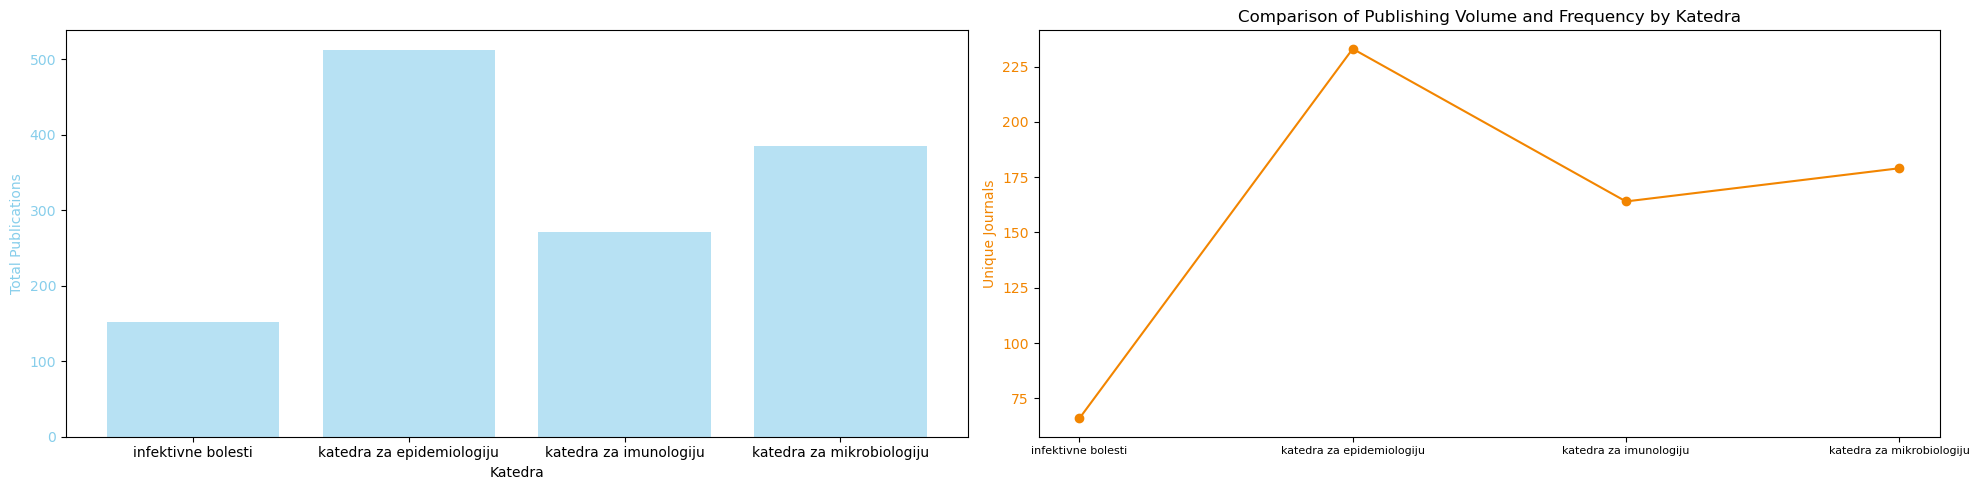

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

# Plot total publications
axes[0].bar(katedra_stats_difference['Katedra'], katedra_stats_difference['Total Publications'], color='#87CEEB', alpha=0.6, label='Total Publications')
axes[0].set_xlabel('Katedra')
axes[0].set_ylabel('Total Publications', color='#87CEEB')
axes[0].tick_params(axis='y', labelcolor='#87CEEB')
plt.xticks(fontsize=8)

# Create another y-axis to plot unique journals
# ax2 = axes[0].twinx()
axes[1].plot(katedra_stats_difference['Katedra'], katedra_stats_difference['Unique Journals'], color='#f28500', marker='o', label='Unique Journals')
axes[1].set_ylabel('Unique Journals', color='#f28500')
axes[1].tick_params(axis='y', labelcolor='#f28500')

# Add title and legends
plt.title('Comparison of Publishing Volume and Frequency by Katedra')
fig.tight_layout()
plt.show()

In [93]:
short_names = autori['Skraceno'].tolist()
def remove_short_names(author_str, short_names):
    author_list = author_str.split(', ')
    filtered_list = [name for name in author_list if name not in short_names]
    return ', '.join(filtered_list)

# Apply the function to the Author column
data['Authors'] = data['Authors'].apply(remove_short_names, short_names=short_names)

In [95]:
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra  Author count  CoauthorsCount  Fraction
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       0.0           Article  infektivne bolesti             1              64  0.015625
1  jasmina simonovic-babic  gasic v., kotur n., zukic b., pavlovic s., kar...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti             5              14  0.071429
2  jasmina simonovic-babic  gasic v., kotur n., zukic b., vukovic m., pavl...  significance of ugt1a1∗28 genotype in patients...  2019.0               journal of medical

In [97]:
data['CoauthorsCount2'] = data['Authors'].apply(lambda x: len(x.split(',')))


In [99]:
avg_authors_per_katedra = radovi_jednom.groupby('Katedra')['Author count'].mean().reset_index()
print(f'Prosecan broj autora po katedri: {avg_authors_per_katedra}')

Prosecan broj autora po katedri:                      Katedra  Author count
0         infektivne bolesti      2.092105
1  katedra za epidemiologiju      1.374269
2     katedra za imunologiju      1.352941
3  katedra za mikrobiologiju      1.883117


In [101]:
print(data.sort_values(by="CoauthorsCount2", ascending=False))

                  Author                                            Authors                                              Title    Year                                   Source title  Issue  Cited by Document Type                    Katedra  Author count  CoauthorsCount  Fraction  CoauthorsCount2
1088  vladimir trajkovic  klionsky d.j., abdelmohsen k., abe a., abedin ...  guidelines for the use and interpretation of a...  2016.0                                      autophagy      1    2617.0        Review     katedra za imunologiju             1            2469  0.000405             2468
1127  vladimir trajkovic  klionsky d.j., abdalla f.c., abeliovich h., ab...  guidelines for the use and interpretation of a...  2012.0                                      autophagy      4    2477.0        Review     katedra za imunologiju             1            1269  0.000788             1268
802       isidora vujcic  lozano r., fullman n., abate d., abay s.m., ab...  measuring progress from 1990 to 

In [103]:
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra  Author count  CoauthorsCount  Fraction  CoauthorsCount2
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       0.0           Article  infektivne bolesti             1              64  0.015625               64
1  jasmina simonovic-babic  gasic v., kotur n., zukic b., pavlovic s., kar...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti             5              14  0.071429                9
2  jasmina simonovic-babic  gasic v., kotur n., zukic b., vukovic m., pavl...  significance of ugt1a1∗28 genotype in p

In [105]:
radovi_jednom = data.drop_duplicates(subset=['Title', 'Year', 'Katedra'])

coutors_authors_mean = radovi_jednom.groupby('Katedra').agg({
    'Author count': 'mean',
    'CoauthorsCount2': 'mean',
}).reset_index()

print(coutors_authors_mean)

                     Katedra  Author count  CoauthorsCount2
0         infektivne bolesti      2.092105         7.190789
1  katedra za epidemiologiju      1.374269        23.957115
2     katedra za imunologiju      1.352941        20.261029
3  katedra za mikrobiologiju      1.872396        56.570312


In [77]:
print(data.head())
data = data.drop(columns=['Authors', 'Issue', 'Fraction','CoauthorsCount'], axis=1)
print(data.head())

                    Author                                            Authors                                              Title    Year                                  Source title Issue  Cited by     Document Type             Katedra  Author count  CoauthorsCount  Fraction
0  jasmina simonovic-babic  chkhartishvili n., holban t., babić j.s., alex...  state of viral hepatitis care in 16 countries ...  2019.0     central european journal of public health     3       NaN           Article  infektivne bolesti             1              64  0.015625
1  jasmina simonovic-babic  gasic v., kotur n., zukic b., pavlovic s., kar...  il-28b genotypes as predictors of long-term ou...  2019.0  journal of infection in developing countries     6       1.0           Article  infektivne bolesti             5               9  0.071429
2  jasmina simonovic-babic  gasic v., kotur n., zukic b., vukovic m., pavl...  significance of ugt1a1∗28 genotype in patients...  2019.0               journal of medical

In [72]:
with open('./data/data_cleaned', 'wb') as file:
    pickle.dump(data, file)